## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
merge_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
# Checking the number of mice.
number = len(merge_df["Mouse ID"])
number

1893

In [4]:
# Getting the duplicate mice by ID number 
#that shows up for Mouse ID and Timepoint.
duplicate_df = merge_df.loc[merge_df.duplicated
                            (subset=["Mouse ID","Timepoint",]),"Mouse ID"].unique()
duplicate_df


array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_df = merge_df[merge_df["Mouse ID"].isin(duplicate_df)==False]
Clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number2 = len(Clean_df["Mouse ID"])
number2

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of 
#mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = Clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = Clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_vari = Clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_stdev = Clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_se = Clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
Summary_df = pd.DataFrame({"Mean": tumor_mean,
                          "Median":tumor_median,
                          "Variance":tumor_vari,
                          "Standard Deviation":tumor_stdev,
                          "Standard Error":tumor_se})
Summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [8]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
count_mice = Clean_df.groupby("Drug Regimen").count()["Mouse ID"]


Text(0.5, 1.0, 'Mouse Tested for Drugs')

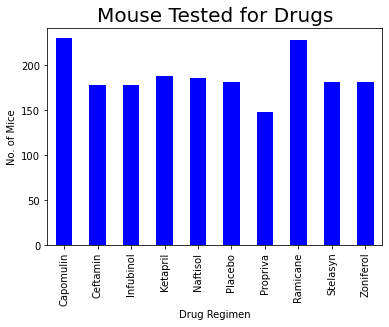

In [9]:
chart = count_mice.plot(kind = "bar", facecolor = "blue")
chart.set_xlabel("Drug Regimen")
chart.set_ylabel("No. of Mice")
chart.set_title("Mouse Tested for Drugs",fontsize = 20)

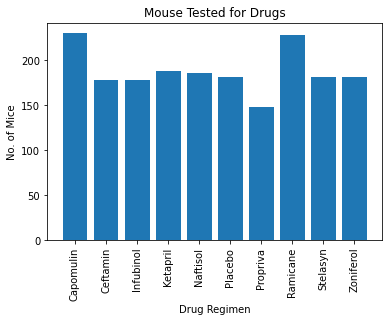

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#drug_treat = Clean_df.groupby(["Mouse ID"])["Drug Regimen"].count()
#drug_treat
y_axis = Clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()
x_axis = np.arange(len(count_mice))
plt.xticks(x_axis, list(count_mice.index), rotation = 'vertical') 
plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Mice")
plt.title("Mouse Tested for Drugs")
plt.show()

In [11]:
Gender_sep = Clean_df["Sex"].value_counts()
Gender_sep

Male      958
Female    922
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Male vs. Female')

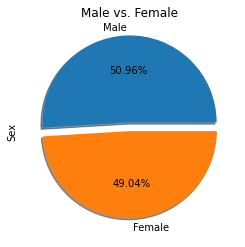

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode =[0.1,0]
chart = Gender_sep.plot(kind = "pie",autopct="%1.2f%%",shadow=True,explode=explode)
chart.set_title("Male vs. Female")

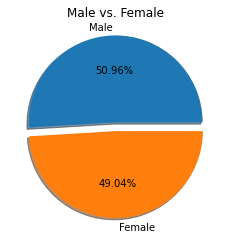

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male","Female"]
sizes = [Gender_sep["Male"],Gender_sep["Female"]]
explode =[0.1,0]
plt.pie(sizes,labels=labels,explode=explode,autopct="%1.2f%%",shadow=True)
plt.title("Male vs. Female")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

four_drugs = Clean_df[Clean_df["Drug Regimen"].isin(drug_list)]
four_drugs.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Start by getting the last (greatest) timepoint for each mouse
group_df = four_drugs.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max()
group_df
# Merge this group df with the original dataframe to 
# get the tumor volume at the last timepoint
dmerge_df = pd.merge(group_df, Clean_df, on = "Timepoint", how = "outer")
dmerge_df.head()

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Set counter to 0.
counter = 0
# Calculate the IQR and quantitatively determine if there are 
# any potential outliers.
for drug in drug_list:
    quartiles = dmerge_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75]).round(2)
    firstq = quartiles[0.25].round(2)
    secondq = quartiles[0.5].round(2) 
    thirdq = quartiles[0.75].round(2)
    iqr = round(thirdq-firstq,2)
    lower_bound = round(firstq - (1.5*iqr),2)
    upper_bound = round(thirdq + (1.5*iqr),2)
    tumor_vol.append(dmerge_df["Tumor Volume (mm3)"])
    
# Check if it is the first time through the for loop, if so then print dividing line at top only  
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {firstq}")
    print(f"The upper quartile of {drug} is: {thirdq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1
    
      
     
    
    # Determine outliers using upper and lower bounds
    

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 45.0
The upper quartile of Capomulin is: 64.96
The interquartile range of Capomulin is: 19.96
The the median of Capomulin is: 54.66 
Values below 15.06 for Capomulin could be outliers.
Values above 94.9 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 45.0
The upper quartile of Ramicane is: 64.96
The interquartile range of Ramicane is: 19.96
The the median of Ramicane is: 54.66 
Values below 15.06 for Ramicane could be outliers.
Values above 94.9 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 45.0
The upper quartile of Infubinol is: 64.96
The interquartile range of Infubinol is: 19.96
The the median of Infubinol is: 54.66 
Values below 15.06 for Infubinol could be outliers.
Va

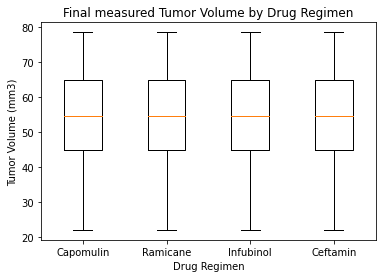

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots() 
ax1.boxplot(tumor_vol)
ax1.set_title("Final measured Tumor Volume by Drug Regimen")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
plt.xticks([1,2,3,4],drug_list)
plt.show()

## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point 
# for a mouse treated with Capomulin.
MwC_df = Clean_df.loc[Clean_df["Drug Regimen"]=="Capomulin",:]
MwC_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [19]:
cap_mouse = MwC_df.groupby(['Timepoint']).agg(\
            tumor_mean=('Tumor Volume (mm3)', np.mean)\
                                             ).round(3)
cap_mouse

,tumor_mean
Timepoint,
0,45.000
5,44.266
10,43.084
15,42.064
20,40.716
25,39.940
30,38.769
35,37.817
40,36.958


Text(0.5, 1.0, 'Timepoint of Tumor Volume for Capomulin')

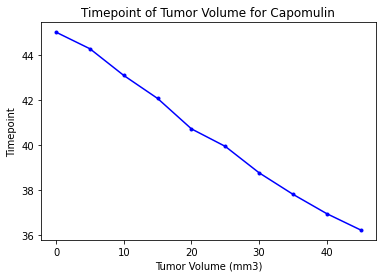

In [20]:
x_axis = list(cap_mouse.index.values)
y_axis = cap_mouse["tumor_mean"]
plt.plot(x_axis, y_axis, marker = ".", color = 'blue')
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.title("Timepoint of Tumor Volume for Capomulin")

In [21]:
Weight_mouse =  MwC_df.groupby(["Weight (g)"]).agg(\
                            TW_mean=('Tumor Volume (mm3)',np.mean)\
                                    )
Weight_mouse

,TW_mean
Weight (g),
15,36.182040
17,37.214133
19,41.182391
20,39.141053
21,42.088700
22,43.288490
23,43.341051
24,44.805810
25,44.062109


Text(0.5, 1.0, 'Timepoint of Tumor Volume for Capomulin')

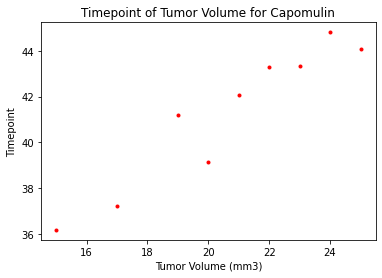

In [22]:
# Generate a scatter plot of 
# average tumor volume vs. mouse weight for the Capomulin regimen.
x_axis= list(Weight_mouse.index.values)
y_axis =  Weight_mouse["TW_mean"]
plt.scatter(x_axis, y_axis, marker = ".", color = 'red')
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.title("Timepoint of Tumor Volume for Capomulin")

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = sts.pearsonr(x_axis,Weight_mouse['TW_mean'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.95
